<a href="https://colab.research.google.com/github/vpavankalyan/Google-Stock-Price-Pediction/blob/main/Google_stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

#Importing Dataset

In [4]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [5]:
train_set = dataset_train.iloc[:, 1:2].values

#Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range=(0,1))

In [8]:
train_set_scaled = sc.fit_transform(train_set)

In [9]:
print(train_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [10]:
train_set.shape

(1258, 1)

In [11]:
print(train_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


# Data Preprocessing

Data Structure with 60 Timestamps and 1 Output

In [12]:
X_train = []

In [13]:
y_train =[]

In [14]:
for i in range(60,1258):
  X_train.append(train_set_scaled[i-60:i,0])
  y_train.append(train_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [15]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [16]:
X_train.shape

(1198, 60)

In [17]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [18]:
y_train.shape

(1198,)

Reshaping

In [19]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [20]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


# Building RNN

## importing related libraries

In [21]:
import tensorflow as tf

In [22]:
from keras.models import Sequential

In [23]:
from keras.layers import Dense

In [24]:
from keras.layers import LSTM

In [25]:
from keras.layers import Dropout

## Building the RNN

In [26]:
regressor = Sequential()

1st Layer

In [27]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [28]:
regressor.add(Dropout(0.2))

2nd Layer

In [29]:
regressor.add(LSTM(units=50,return_sequences=True))

In [30]:
regressor.add(Dropout(0.2))

3rd Layer

In [31]:
regressor.add(LSTM(units=50,return_sequences=True))

In [32]:
regressor.add(Dropout(0.2))

4th Layer

In [33]:
regressor.add(LSTM(units=50))

In [34]:
regressor.add(Dropout(0.2))

Output Layer

In [35]:
regressor.add(Dense(units=1))

Compiling the RNN

In [36]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [37]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 25s 16ms/step - loss: 0.0731
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 13/100
38/38 [====

# Predicting for 2017

In [38]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')

In [39]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [40]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [41]:
real_stock_price.shape

(20, 1)

In [42]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [43]:
print(dataset_total)

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64


In [44]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [45]:
print(inputs)

[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]


In [46]:
inputs = inputs.reshape(-1,1)

In [48]:
inputs = sc.transform(inputs)

In [49]:
print(inputs)

[[0.9299055 ]
 [0.93113327]
 [0.92750577]
 [0.94415507]
 [0.93876032]
 [0.93403527]
 [0.93483518]
 [0.9313937 ]
 [0.94636878]
 [0.96569685]
 [0.97510976]
 [0.95966962]
 [0.97808617]
 [1.        ]
 [0.98076494]
 [0.97083116]
 [0.98450406]
 [0.96054394]
 [0.9371419 ]
 [0.92841729]
 [0.90804747]
 [0.8771858 ]
 [0.92153434]
 [0.93809063]
 [0.93165414]
 [0.95254483]
 [0.88812412]
 [0.88637547]
 [0.87032145]
 [0.88563137]
 [0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]
 [0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  ]
 [0.97

In [50]:
inputs.shape

(80, 1)

In [51]:
X_test=[]

In [52]:
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [53]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [54]:
pred_stock_price = regressor.predict(X_test)

In [55]:
pred_stock_price=sc.inverse_transform(pred_stock_price)

# Visualizing Predictions with Real Data

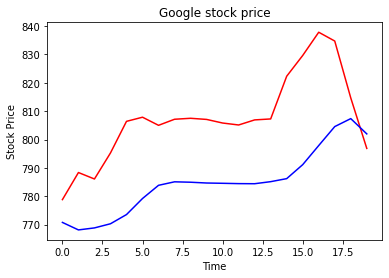

In [56]:
plt.plot(real_stock_price,color='red',label='real google stock price')
plt.plot(pred_stock_price,color='blue',label='predicted google stock price')
plt.title('Google stock price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

# Evaluation

In [61]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, pred_stock_price))
rmse = rmse/800

for a relative error we will divide by rough range of values in this case 800

In [62]:
print(rmse)

0.03122453990975413
